In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

 Load the dataset:

In [3]:
df = pd.read_csv('dataset/occupancy_all.csv')

In [4]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-02T14:19:00.000+01:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2,2015-02-02T14:19:59.000+01:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,3,2015-02-02T14:21:00.000+01:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,4,2015-02-02T14:22:00.000+01:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,5,2015-02-02T14:23:00.000+01:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20560 non-null  int64  
 1   date           20560 non-null  object 
 2   Temperature    20560 non-null  float64
 3   Humidity       20560 non-null  float64
 4   Light          20560 non-null  float64
 5   CO2            20560 non-null  float64
 6   HumidityRatio  20560 non-null  float64
 7   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


Summary Statistics:

In [6]:
df.describe()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,10280.500000,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,5935.305103,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,5140.750000,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,10280.500000,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,15420.250000,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,20560.000000,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Missing Values:

In [7]:
df.isnull().sum()

id               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Distributions of Numerical Features:

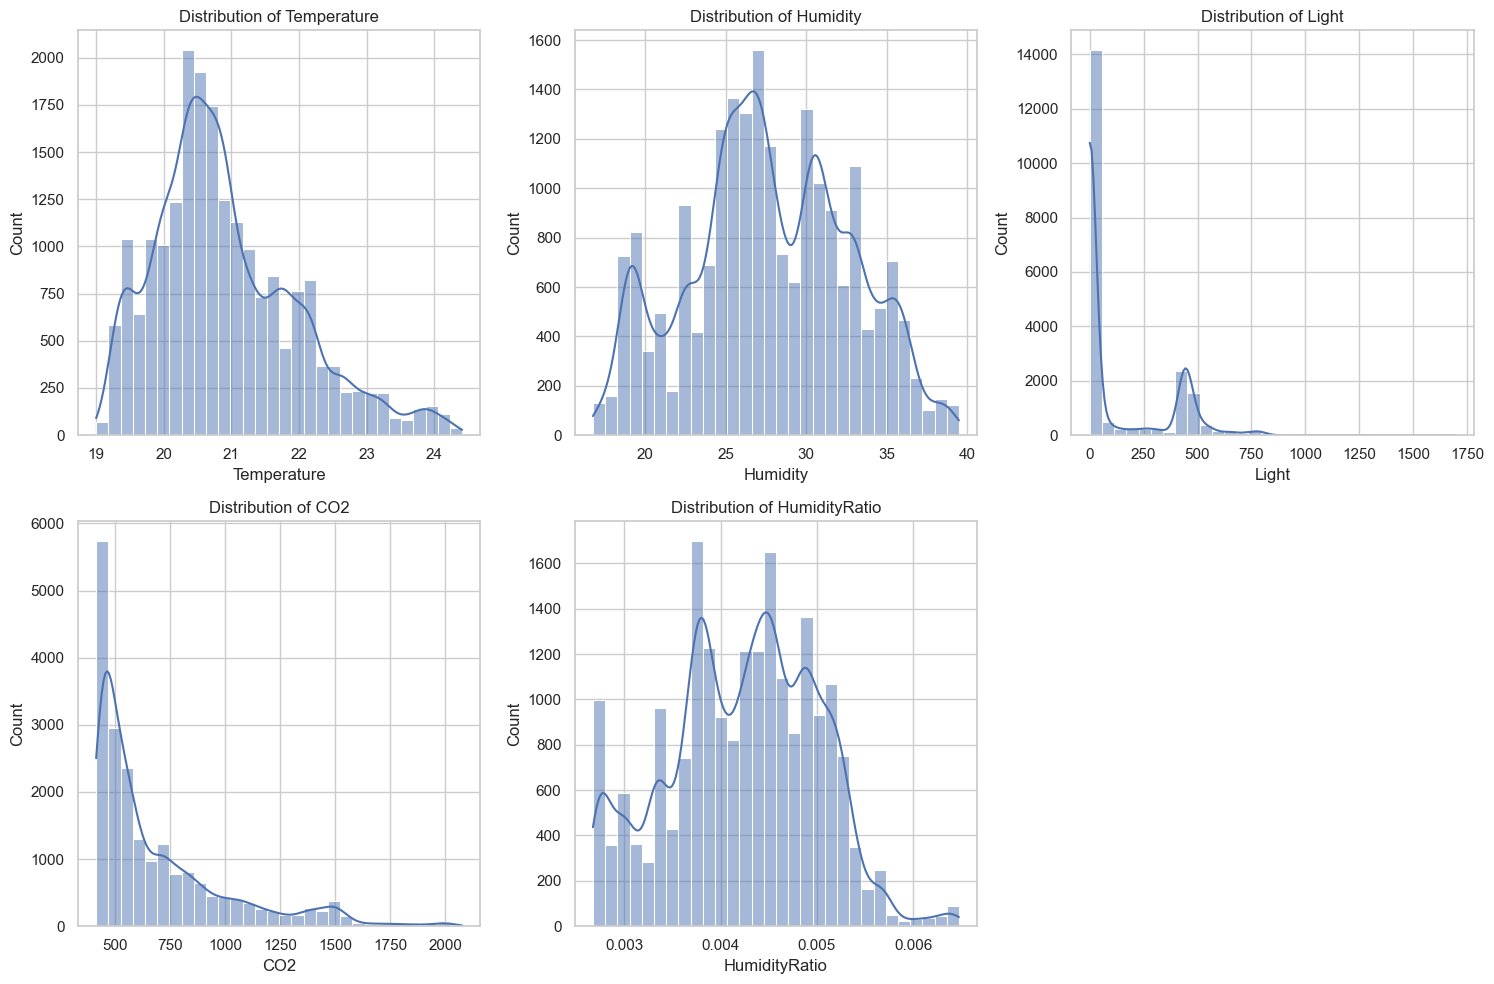

In [8]:
df['date'] = pd.to_datetime(df['date'])

numerical_cols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Countplot of Occupancy:

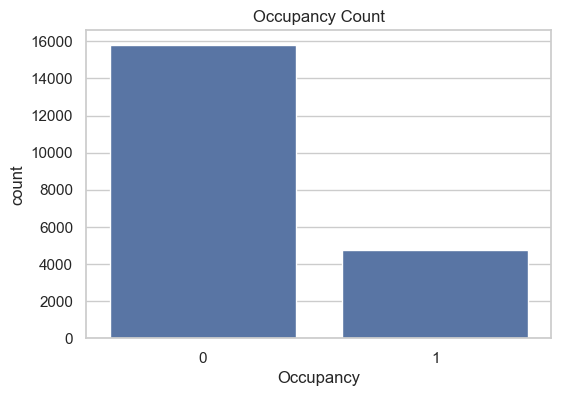

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Occupancy', data=df)
plt.title('Occupancy Count')

Correlation Heatmap:

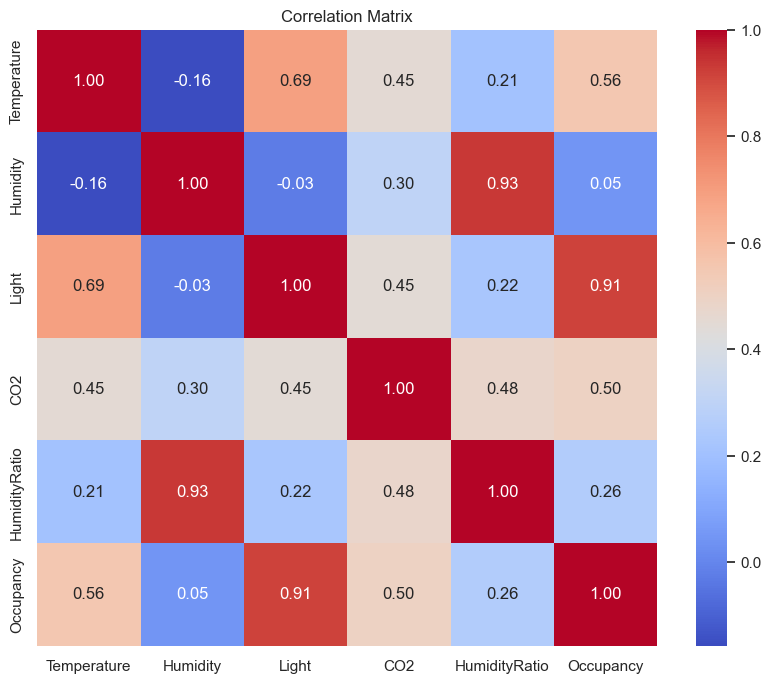

In [10]:
plt.figure(figsize=(10, 8))
corr = df[numerical_cols + ['Occupancy']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

Boxplots of Features vs Occupancy:

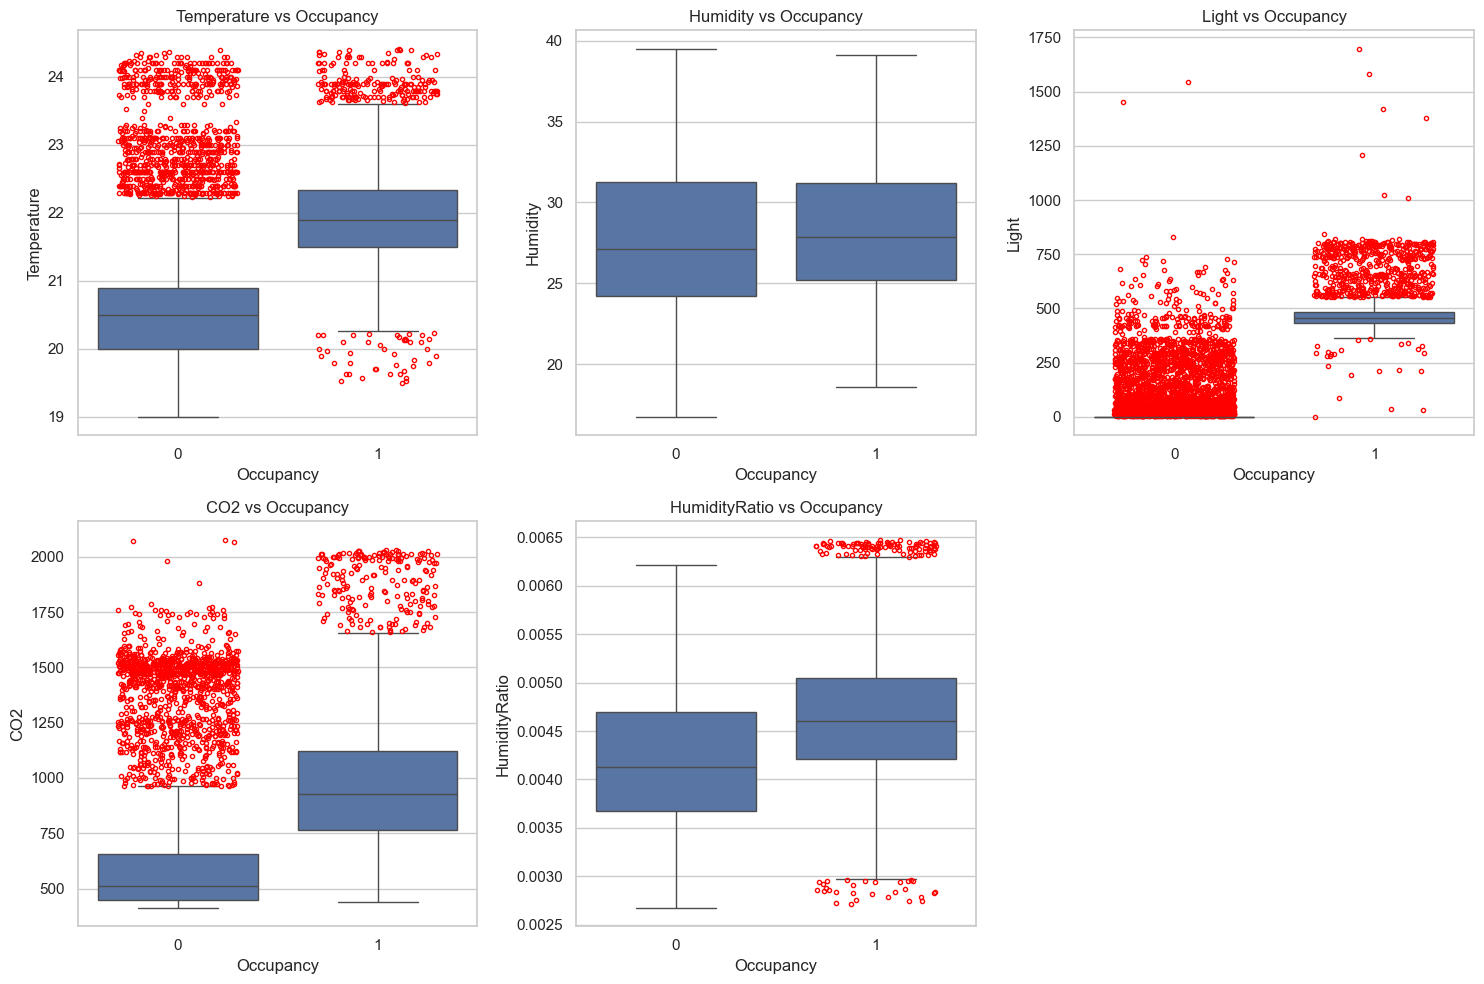

In [11]:
flierprops = {
     'marker': '.',
     'markeredgecolor': 'red',
     'markerfacecolor': 'none'
}

random.seed(0)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(x='Occupancy', y=col, data=df, flierprops=flierprops)
    plt.title(f'{col} vs Occupancy')
    for l in ax.lines:
     if l.get_marker() != '':
          xs = l.get_xdata()
          xs += np.random.uniform(-0.3, 0.3, len(xs))
          l.set_xdata(xs)
plt.tight_layout()

Time Series:

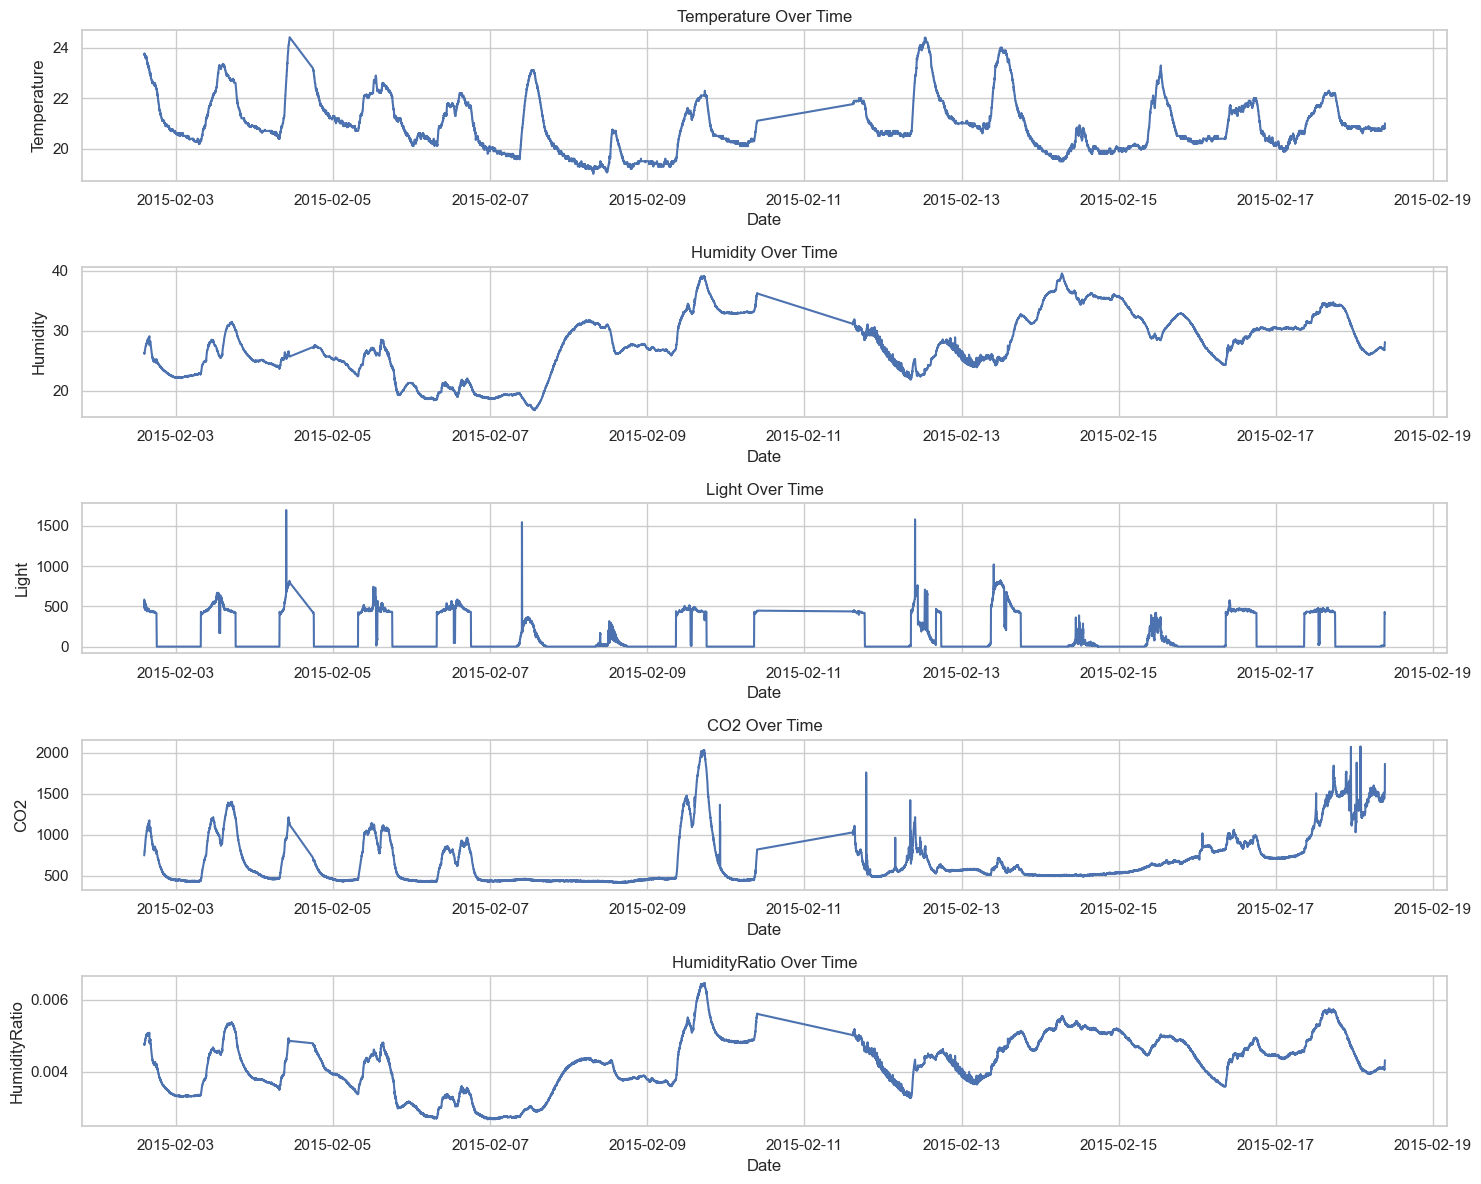

In [12]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 1, i)
    plt.plot(df['date'], df[col])
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
plt.tight_layout()

Summary:
The dataset is imbalanced. The room is unoccupied (77%) far more often than it is occupied (23%). We need to handle the class imbalance. Light  has an high correlation (~0.91) with occupancy, it will be removed on model creation. We could combine Humidity with HumidityRatio, but having this few columns we will not be doing that.